In [2]:
import sys, os
print(sys.executable)
print(os.getcwd())

C:\Users\chenr\miniforge3\envs\astropy\python.exe
C:\Users\chenr\OneDrive\Desktop\phys-134-proj


In [3]:
rootfolder=os.getcwd().replace('\\','/')
print(rootfolder)

C:/Users/chenr/OneDrive/Desktop/phys-134-proj


In [4]:
os.chdir(f"{rootfolder}/lco_data-20251202-36")
os.getcwd()

'C:\\Users\\chenr\\OneDrive\\Desktop\\phys-134-proj\\lco_data-20251202-36'

In [5]:
import pickle 
with open('merged_data.pkl', 'rb') as f:
    merged_data = pickle.load(f)
merged_data.keys()

dict_keys(['2025-11-25-h02-m00-s14-ms936-tfn.fits', '2025-11-25-h05-m00-s13-ms688-lsc.fits', '2025-11-25-h05-m36-s42-ms454-lsc.fits', '2025-11-25-h06-m06-s14-ms909-lsc.fits', '2025-11-25-h07-m45-s12-ms840-elp.fits', '2025-11-25-h08-m30-s09-ms718-elp.fits', '2025-11-25-h09-m06-s12-ms841-elp.fits', '2025-11-25-h10-m06-s14-ms367-elp.fits', '2025-11-25-h11-m06-s18-ms072-elp.fits', '2025-11-25-h12-m47-s39-ms526-ogg.fits', '2025-11-25-h13-m06-s13-ms287-ogg.fits', '2025-11-25-h14-m06-s15-ms196-ogg.fits', '2025-11-25-h23-m02-s40-ms929-tfn.fits', '2025-11-25-h23-m35-s17-ms210-cpt.fits', '2025-11-26-h00-m55-s17-ms907-tfn.fits', '2025-11-26-h01-m55-s17-ms940-tfn.fits', '2025-11-26-h02-m10-s07-ms425-tfn.fits', '2025-11-26-h03-m06-s19-ms581-tfn.fits', '2025-11-26-h04-m06-s16-ms133-tfn.fits', '2025-11-26-h05-m35-s14-ms393-lsc.fits', '2025-11-26-h06-m06-s06-ms084-lsc.fits', '2025-11-26-h07-m59-s44-ms591-elp.fits', '2025-11-26-h08-m06-s06-ms512-elp.fits', '2025-11-26-h11-m06-s14-ms445-ogg.fits', '2025

BSCALE and BZERO are not in the header, so the image is unscaled.

In [8]:
import sys, numpy as np
from astropy import wcs
from astropy.io import fits
from astropy.nddata import NDData, StdDevUncertainty

for key in merged_data.keys():
    filename = key
    print("Loading file:", filename)
    hdul = fits.open(filename)
    img_data = hdul['SCI'].data #numpy.ndarray
    onesigma_data = hdul['ERR'].data #numpy.ndarray
    meta_data = hdul['SCI'].header # astropy.io.fits.header.Header
    wcs_data = wcs.WCS(meta_data) # astropy.wcs.wcs.WCS
    hdul.close()
    
    merged_data[key]['nddata'] = NDData(
        data=img_data,
        wcs=wcs_data,
        uncertainty=StdDevUncertainty(onesigma_data),
        meta=meta_data
    )

Loading file: 2025-11-25-h02-m00-s14-ms936-tfn.fits


Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -30.167703 from OBSGEO-[XYZ].
Set OBSGEO-H to     2197.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Loading file: 2025-11-25-h05-m00-s13-ms688-lsc.fits
Loading file: 2025-11-25-h05-m36-s42-ms454-lsc.fits
Loading file: 2025-11-25-h06-m06-s14-ms909-lsc.fits
Loading file: 2025-11-25-h07-m45-s12-ms840-elp.fits


Set OBSGEO-B to    30.680041 from OBSGEO-[XYZ].
Set OBSGEO-H to     2026.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Loading file: 2025-11-25-h08-m30-s09-ms718-elp.fits
Loading file: 2025-11-25-h09-m06-s12-ms841-elp.fits
Loading file: 2025-11-25-h10-m06-s14-ms367-elp.fits
Loading file: 2025-11-25-h11-m06-s18-ms072-elp.fits
Loading file: 2025-11-25-h12-m47-s39-ms526-ogg.fits
Loading file: 2025-11-25-h13-m06-s13-ms287-ogg.fits


Set OBSGEO-B to    20.706969 from OBSGEO-[XYZ].
Set OBSGEO-H to     3033.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Loading file: 2025-11-25-h14-m06-s15-ms196-ogg.fits
Loading file: 2025-11-25-h23-m02-s40-ms929-tfn.fits


Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -32.380633 from OBSGEO-[XYZ].
Set OBSGEO-H to     1756.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Loading file: 2025-11-25-h23-m35-s17-ms210-cpt.fits
Loading file: 2025-11-26-h00-m55-s17-ms907-tfn.fits
Loading file: 2025-11-26-h01-m55-s17-ms940-tfn.fits
Loading file: 2025-11-26-h02-m10-s07-ms425-tfn.fits
Loading file: 2025-11-26-h03-m06-s19-ms581-tfn.fits
Loading file: 2025-11-26-h04-m06-s16-ms133-tfn.fits
Loading file: 2025-11-26-h05-m35-s14-ms393-lsc.fits
Loading file: 2025-11-26-h06-m06-s06-ms084-lsc.fits
Loading file: 2025-11-26-h07-m59-s44-ms591-elp.fits
Loading file: 2025-11-26-h08-m06-s06-ms512-elp.fits
Loading file: 2025-11-26-h11-m06-s14-ms445-ogg.fits
Loading file: 2025-11-26-h12-m06-s12-ms274-ogg.fits
Loading file: 2025-11-26-h13-m06-s14-ms392-ogg.fits
Loading file: 2025-11-26-h14-m06-s13-ms681-ogg.fits
Loading file: 2025-11-26-h15-m14-s48-ms233-coj.fits


Set OBSGEO-B to   -31.272819 from OBSGEO-[XYZ].
Set OBSGEO-H to     1126.993 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Loading file: 2025-11-26-h23-m00-s14-ms461-cpt.fits
Loading file: 2025-11-26-h23-m35-s15-ms525-cpt.fits
Loading file: 2025-11-27-h04-m59-s38-ms384-tfn.fits
Loading file: 2025-11-27-h05-m06-s21-ms675-tfn.fits
Loading file: 2025-11-27-h07-m44-s42-ms254-elp.fits
Loading file: 2025-11-27-h08-m06-s11-ms940-elp.fits
Loading file: 2025-11-27-h12-m41-s15-ms437-ogg.fits
Loading file: 2025-11-27-h13-m06-s14-ms257-ogg.fits


In [9]:
merged_data[list(merged_data.keys())[0]].keys()

#     merged_data[key]
#         'icrs': dict {
#             'ra': catalog_data[key]['RA'],
#             'dec': catalog_data[key]['Dec']
#         },
#         'image': dict {
#             'x': region_data[key]['x'],
#             'y': region_data[key]['y']
#         }
#         'nddata': astropy.nddata
#                   - data : numpy.ndarray
#                   - uncertainty : astropy.nddata.StdDevUncertainty (subclass of NDUncertainty)
#                   - wcs : astropy.wcs.wcs.WCS
#                   - meta : astropy.io.fits.header.Header

dict_keys(['icrs', 'image', 'nddata'])

In [10]:

# A: GAUSSIAN FITING
# For each observation file:
#     Load entire image array
#     For each reference star in merged_data: (from pickle): 
#       Use function to fit 2D Gaussian on that cutout to get centroid and sigma values (x_fit, y_fit, sigma_fit)
#     New arrays: xs_fit, ys_fit, sigmas_fit for all reference stars in this observation file.
#       Check that its length matches number of reference stars.
#     Store in merged_data under this observation file's key as new dict entry 'image_fit'

# new merged_data structure:
#     merged_data[observation file]={
#         'icrs': {
#             'ra': catalog_data[key]['RA'],
#             'dec': catalog_data[key]['Dec']
#         },
#         'image': {
#             'x': region_data[key]['x'],
#             'y': region_data[key]['y']
#         },
#         'nddata': astropy.nddata,
#         'image_fit': {
#             'xs_fit': array of x centroids,
#             'ys_fit': array of y centroids,
#             'sigmas_fit': array of sigma values
#         }
#     }

#B: APERTURE PHOTOMETRY
#     Designate apertures and annuli based on x_cen, y_cen, where app_rad=7*sigma_xy, ann_rad_in=9*sigma_xy, ann_rad_out=11*sigma_xy

#     Calculate total flux subtracted by background, using 3-sigma medium clip on annulus pixels to get background level
#     Store flux in array whose index matches reference star index in region_data
#
#     Generate an tile plot for this observation file, showing each reference star with aperture and annulus overlaid
# At end, save all flux arrays to file using pickle

# Image processing function (debugging)
def imageprocessing(arr, a=1000, contrast=1, bias=0.5):
    min_im, max_im = np.min(arr), np.max(arr)
    norm = (arr - min_im) / (max_im - min_im)
    log = np.log(1 + a*norm) / np.log(1+a)
    final_data = (log- 0.5) * contrast + bias
    final_data = np.clip(final_data, 0, 1)
    return final_data


# 1: Gaussian Fitting

Because we need the centers and sigmas to get aperture photom

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
for idx, key in enumerate(merged_data.keys()):
    filename = key
    print(f"Fitting Gaussians for file {idx+1} of {len(merged_data.keys())}: {filename}")
    #Gaussian2D model: amplitude, x_mean, y_mean, x_stddev, y_stddev, theta | None, cov_matrix | None
    # we'll just use the larger stdev and assume symmetric 2d gaussian later
    #using lmlsqfitter since we want a greedy fit since we're quite confident with initial guesses
    #x_mean and y_mean are the centroid positions, we already have good estimates
    
    # starting with an amplitude estimate
    # amplitude can be estimated as max pixel value in cutout - median pixel value in cutout
    # lets slice a 31 pixel cutout (+-15 pixels square) around each reference star centroid's rounded image x,y
    
    #within frame !!!!
    #array of 2d arrays, given by +- 15 pixels from center, where center is rounded x,y from merged_data
    #1 per reference star
    
    pixel_array = merged_data[filename]['nddata'].data
    offset = 15
    
    # +1 on ends since ends are exlusive in python slicing
    cutouts = [pixel_array[round(y)-offset:round(y)+offset+1, round(x)-offset:round(x)+offset+1]
               for x,y
               in zip(merged_data[filename]['image']['x'], merged_data[filename]['image']['y'])]
    
    uncertainties = [merged_data[filename]['nddata'].uncertainty.array[round(y)-offset:round(y)+offset+1, round(x)-offset:round(x)+offset+1]
               for x,y
               in zip(merged_data[filename]['image']['x'], merged_data[filename]['image']['y'])]
    
    amp_guesses = [np.max(cutout) - np.median(cutout) for cutout in cutouts]
    x0_guesses = merged_data[filename]['image']['x']
    y0_guesses = merged_data[filename]['image']['y']
    #sigma guess is just 2 for now
    x_fits = []
    y_fits = []
    sigmas_fit = []
    
    #perform fit
    for idx_cutout, cutout in enumerate(cutouts):
        amp_guess = amp_guesses[idx_cutout]
        x0_guess = offset  # since cutout is centered around star, x0 and y0 are at center of cutout
        y0_guess = offset
        sigma_guess = 2.0
        
        gauss_init = models.Gaussian2D(amplitude=amp_guess,
                                       x_mean=x0_guess,
                                       y_mean=y0_guess,
                                       x_stddev=sigma_guess,
                                       y_stddev=sigma_guess)
        
        fit_p = fitting.LevMarLSQFitter()
        y_indices, x_indices = np.mgrid[0:cutout.shape[0], 0:cutout.shape[1]]   
        gauss_fit = fit_p(gauss_init, x_indices, y_indices, cutout, weights = 1/(uncertainties[idx_cutout] + 1e-6))
        
        # since the fits are on a cutout, the image adjustment is: fit + rounded original center - offset
        x_fits.append(gauss_fit.x_mean.value + round(merged_data[filename]['image']['x'][idx_cutout]) - offset)
        y_fits.append(gauss_fit.y_mean.value + round(merged_data[filename]['image']['y'][idx_cutout]) - offset)
        sigmas_fit.append((gauss_fit.x_stddev.value + gauss_fit.y_stddev.value) / 2.0)
        
    merged_data[filename]['image_fit'] = {
        'xs_fit': np.array(x_fits),
        'ys_fit': np.array(y_fits),
        'sigmas_fit': np.array(sigmas_fit)
    }

Fitting Gaussians for file 1 of 36: 2025-11-25-h02-m00-s14-ms936-tfn.fits
Fitting Gaussians for file 2 of 36: 2025-11-25-h05-m00-s13-ms688-lsc.fits
Fitting Gaussians for file 3 of 36: 2025-11-25-h05-m36-s42-ms454-lsc.fits
Fitting Gaussians for file 4 of 36: 2025-11-25-h06-m06-s14-ms909-lsc.fits
Fitting Gaussians for file 5 of 36: 2025-11-25-h07-m45-s12-ms840-elp.fits
Fitting Gaussians for file 6 of 36: 2025-11-25-h08-m30-s09-ms718-elp.fits
Fitting Gaussians for file 7 of 36: 2025-11-25-h09-m06-s12-ms841-elp.fits
Fitting Gaussians for file 8 of 36: 2025-11-25-h10-m06-s14-ms367-elp.fits
Fitting Gaussians for file 9 of 36: 2025-11-25-h11-m06-s18-ms072-elp.fits
Fitting Gaussians for file 10 of 36: 2025-11-25-h12-m47-s39-ms526-ogg.fits
Fitting Gaussians for file 11 of 36: 2025-11-25-h13-m06-s13-ms287-ogg.fits
Fitting Gaussians for file 12 of 36: 2025-11-25-h14-m06-s15-ms196-ogg.fits
Fitting Gaussians for file 13 of 36: 2025-11-25-h23-m02-s40-ms929-tfn.fits
Fitting Gaussians for file 14 of 3

Fitting Gaussians for file 15 of 36: 2025-11-26-h00-m55-s17-ms907-tfn.fits
Fitting Gaussians for file 16 of 36: 2025-11-26-h01-m55-s17-ms940-tfn.fits
Fitting Gaussians for file 17 of 36: 2025-11-26-h02-m10-s07-ms425-tfn.fits
Fitting Gaussians for file 18 of 36: 2025-11-26-h03-m06-s19-ms581-tfn.fits
Fitting Gaussians for file 19 of 36: 2025-11-26-h04-m06-s16-ms133-tfn.fits
Fitting Gaussians for file 20 of 36: 2025-11-26-h05-m35-s14-ms393-lsc.fits
Fitting Gaussians for file 21 of 36: 2025-11-26-h06-m06-s06-ms084-lsc.fits
Fitting Gaussians for file 22 of 36: 2025-11-26-h07-m59-s44-ms591-elp.fits
Fitting Gaussians for file 23 of 36: 2025-11-26-h08-m06-s06-ms512-elp.fits
Fitting Gaussians for file 24 of 36: 2025-11-26-h11-m06-s14-ms445-ogg.fits
Fitting Gaussians for file 25 of 36: 2025-11-26-h12-m06-s12-ms274-ogg.fits
Fitting Gaussians for file 26 of 36: 2025-11-26-h13-m06-s14-ms392-ogg.fits
Fitting Gaussians for file 27 of 36: 2025-11-26-h14-m06-s13-ms681-ogg.fits
Fitting Gaussians for fil

### Debugging

2025-11-25-h23-m02-s40-ms929-tfn.fits


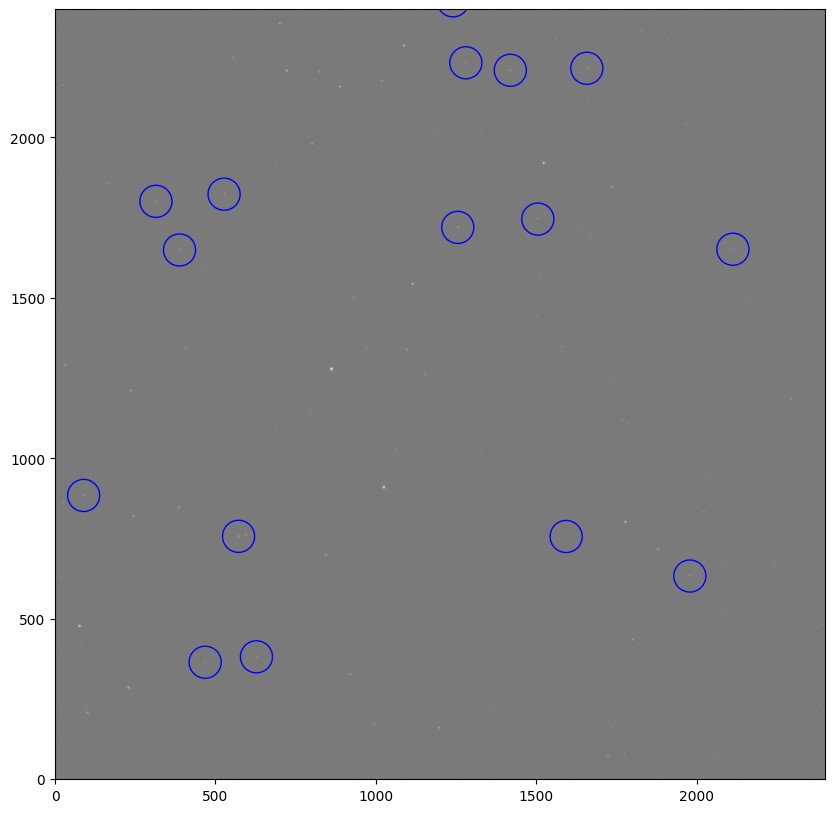

In [15]:
# appears to be an issue on frame 13.

#imageprocessing
# --- IGNORE ---
idx = 12
#file name print
print(list(merged_data.keys())[idx])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


processed_image = imageprocessing(merged_data[list(merged_data.keys())[idx]]['nddata'].data)
ax.imshow(processed_image, cmap='gray', origin='lower')
for idx_star in range(len(merged_data[list(merged_data.keys())[idx]]['image']['x'])):
    x_fit = merged_data[list(merged_data.keys())[idx]]['image_fit']['xs_fit'][idx_star]
    y_fit = merged_data[list(merged_data.keys())[idx]]['image_fit']['ys_fit'][idx_star]
    sigma_fit = merged_data[list(merged_data.keys())[idx]]['image_fit']['sigmas_fit'][idx_star]
    # ax.plot(x_fit, y_fit, marker='x', color='red', markersize=10)
    circle = plt.Circle((x_fit, y_fit), radius=50, color='blue', fill=False)
    ax.add_patch(circle)
plt.show()

It appears that the reference star is cut off from the frame. This means that we will no longer consider that reference star for the analysis for the sake of keeping data balanced.

We'll also check the distribution of variances of our reference stars.

In [48]:
#     merged_data[observation file]={
#         'icrs': {
#             'ra': catalog_data[key]['RA'],
#             'dec': catalog_data[key]['Dec']
#         },
#         'image': {
#             'x': region_data[key]['x'],
#             'y': region_data[key]['y']
#         },
#         'nddata': astropy.nddata,
#         'image_fit': {
#             'xs_fit': array of x centroids,
#             'ys_fit': array of y centroids,
#             'sigmas_fit': array of sigma values
#         }
#     }

#put into array
sigmas = np.array([merged_data[key]['image_fit']['sigmas_fit'] for key in merged_data.keys()])
#there are some extreme outliers, likely bad fits
# I need to find the frame and star index of these outliers to debug, of those more than 3 sigma from mean
# These sigmas are compared within each frame they're of similar magnitude and seeing conditions change between frames
mean_sigmas = np.mean(sigmas, axis=1)
std_sigmas = np.std(sigmas, axis=1)
outlier_frames = []
for idx_frame in range(sigmas.shape[0]):
    for idx_star in range(sigmas.shape[1]):
        if abs(sigmas[idx_frame, idx_star] - mean_sigmas[idx_frame]) > 3*std_sigmas[idx_frame]:
            outlier_frames.append((idx_frame, idx_star, sigmas[idx_frame, idx_star]))
outlier_frames

[]

Looks like that's the only bad data point. We'll use a reference index blacklist

In [17]:
bad_ref_stars = [15]

# 2: Aperture Photometry

#### Checking Sigmas of gaussian fits

We define an inner region, on which the entire region is integrated, then an outer region, assumed to be the background.

The radii and offsets should be the same so we don't introduce systematic error in this process.

If we did vary region, like for ex. on the std. then larger = more background light = incresed variance

In [18]:
np.min(sigmas, axis=1), mean_sigmas, np.max(sigmas, axis=1), std_sigmas

(array([1.07714425e+00, 1.24836387e+00, 1.85834674e+00, 1.57316386e+00,
        1.06758971e+00, 2.12904240e+00, 1.66575393e+00, 1.13186653e+00,
        1.61715248e+00, 1.34511278e+00, 1.31562543e+00, 1.38326814e+00,
        1.54379178e+00, 1.68338470e+00, 1.20566123e+00, 1.38502573e+00,
        1.13800889e+00, 1.27729936e+00, 1.17549435e-38, 1.20956995e+00,
        1.09455333e+00, 1.16878651e+00, 1.42933074e+00, 1.16674575e+00,
        9.61088871e-01, 9.63501782e-01, 1.57849318e+00, 1.70581519e+00,
        1.66738436e+00, 1.70956349e+00, 2.11871324e+00, 1.82100359e+00,
        1.20471087e+00, 1.17691036e+00, 1.82952213e+00, 1.34958678e+00]),
 array([1.13986315, 1.35151937, 1.99491433, 1.66208815, 1.16938764,
        2.19704693, 1.73170312, 1.27943116, 1.79717869, 1.44670754,
        1.42594765, 1.49211295, 1.88915236, 1.85622047, 1.28357739,
        1.4569124 , 1.21287546, 1.3406342 , 9.23990915, 1.27591958,
        1.15438952, 1.30930249, 1.55457273, 1.27504414, 1.0964691 ,
        1.

There's some weird data like very small sigma or very large variances. we should investigate

In [47]:
#mean too large
bad_frames_mean = [i for i,mean in enumerate(mean_sigmas) if mean - np.std(mean_sigmas) > 2]
#std too large
bad_frames_std = [i for i,std in enumerate(std_sigmas) if std - np.std(std_sigmas) > 2]
#max too large
bad_frames_max = [i for i,maximum in enumerate(np.max(sigmas, axis=1)) if maximum - np.std(np.max(sigmas, axis=1)) > 2]
bad_frames_mean, bad_frames_std, bad_frames_max



([18], [18], [18])

In [20]:
bad_frame = [18]

So far we've blacklisted an entire frame and reference star from all frames

In [46]:
# lets pick the largest sigma from the entire dataset
#exclude any bad ref stars in bad_ref_stars
#exclude any bad frames in bad_frame
mask = np.ones_like(sigmas, dtype=bool)
for bf in bad_frame:
    mask[bf, :] = False
for brs in bad_ref_stars:
    mask[:, brs] = False
    
masked_sigmas = sigmas[mask].reshape(sigmas.shape[0]-len(bad_frame), sigmas.shape[1]-len(bad_ref_stars))
worst_sigma = np.max(masked_sigmas)
#which index has this worst sigma?
worst_sigma_index = np.unravel_index(np.argmax(masked_sigmas), masked_sigmas.shape)
worst_sigma, worst_sigma_index, sigmas[30,5]



(np.float64(2.392455065849953),
 (np.int64(29), np.int64(5)),
 np.float64(2.392455065849953))

Visualization of worst star sigma

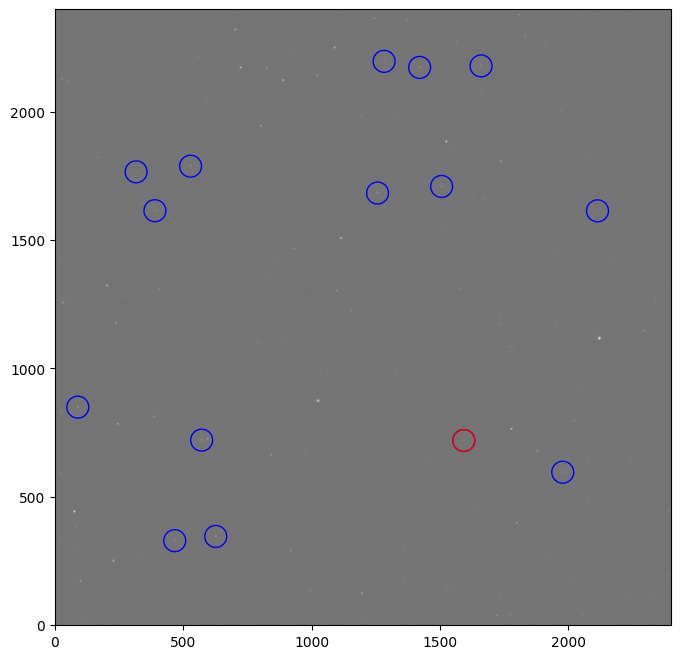

In [54]:
from astropy.nddata.utils import Cutout2D
# test run on 1
frame_idx = 30
refstar_idx = 5

key = list(merged_data.keys())[frame_idx]
    
pixel_array = merged_data[key]['nddata'].data  

fig,ax = plt.subplots(figsize=(8,8))
processed_image = imageprocessing(pixel_array)
ax.imshow(processed_image, cmap='gray', origin='lower')
for idx_star in range(len(merged_data[key]['image']['x'])):
    x_fit = merged_data[key]['image_fit']['xs_fit'][idx_star]
    y_fit = merged_data[key]['image_fit']['ys_fit'][idx_star]
    # ax.plot(x_fit, y_fit, marker='x', color='red', markersize=10)
    circle = plt.Circle((x_fit, y_fit), radius=sigma_fit*10, color='blue', fill=False)
    ax.add_patch(circle)
    
x_fit = merged_data[key]['image_fit']['xs_fit'][refstar_idx]
y_fit = merged_data[key]['image_fit']['ys_fit'][refstar_idx]
circle1 = plt.Circle((x_fit, y_fit), radius=sigma_fit*10, color='red', fill=False)
ax.add_patch(circle1)
plt.show()

At this point, we're going remove all the bad data, from everywhere

In [ ]:
#     merged_data[observation file]={
#         'icrs': {
#             'ra': catalog_data[key]['RA'],
#             'dec': catalog_data[key]['Dec']
#         },
#         'image': {
#             'x': region_data[key]['x'],
#             'y': region_data[key]['y']
#         },
#         'nddata': astropy.nddata,
#         'image_fit': {
#             'xs_fit': array of x centroids,
#             'ys_fit': array of y centroids,
#             'sigmas_fit': array of sigma values
#         }
#     }

#removing bad frames:
for bf in bad_frame:
    del merged_data[list(merged_data.keys())[bf]]
    
#removed bad ref stars from merged_data
for key in merged_data.keys():
    for brs in sorted(bad_ref_stars, reverse=True):
            merged_data[key]['icrs']['ra'] = np.delete(merged_data[key]['icrs']['ra'], brs)
            merged_data[key]['icrs']['dec'] = np.delete(merged_data[key]['icrs']['dec'], brs)
            merged_data[key]['image']['x'] = np.delete(merged_data[key]['image']['x'], brs)
            merged_data[key]['image']['y'] = np.delete(merged_data[key]['image']['y'], brs)
            merged_data[key]['image_fit']['xs_fit'] = np.delete(merged_data[key]['image_fit']['xs_fit'], brs)
            merged_data[key]['image_fit']['ys_fit'] = np.delete(merged_data[key]['image_fit']['ys_fit'], brs)
            merged_data[key]['image_fit']['sigmas_fit'] = np.delete(merged_data[key]['image_fit']['sigmas_fit'], brs)

Since we're working with a power law system here, it is better to use the median -- rather than the mean -- as an estimator for the "true" background mean, which closely approximates a gaussian due to its high poisson count, and other errors. This is because the sample standard deviation does not square differences which helps for large outliers.

Since we're using the median as an estimator for true mean, its also better to estimate the true standard deviation in this manner:

The MAD (Median Absolute Deviation): $\displaystyle \frac{1}{n} \sum |x_i - \tilde{x_i} |$

Let $X \sim \mathcal{N}(\mu, \sigma^2)$.
$$P(|X - \mu| \le \text{MAD}) = 0.5$$

So then

$$P\left( \frac{|X - \mu|}{\sigma} \le \frac{\text{MAD}}{\sigma} \right) = 0.5$$

$$P\left( Z \le \frac{\text{MAD}}{\sigma} \right) - P(Z \le 0) = 0.25$$

$$P\left( Z \le \frac{\text{MAD}}{\sigma} \right) = 0.75$$

$$\frac{\text{MAD}}{\sigma} = \Phi^{-1}(0.75)$$

$$\implies \hat{\sigma} = \frac{\text{MAD}}{\Phi^{-1}(0.75)} =  \frac{\text{MAD}}{0.6745}

We need to standard deviation of the median, so we apply a few more transformations:
(556: MATHEMATICAL STATISTICS I
ASYMPTOTIC DISTRIBUTION OF SAMPLE QUANTILES)
Sample Median Var:
$$\text{Var}(\tilde{x}) \approx \frac{1}{4 N [f(\mu)]^2}= \frac{1}{4 N \left( \frac{1}{\sigma\sqrt{2\pi}} \right)^2} = \frac{\pi\sigma^2}{2N}= \left( \sqrt{\frac{\pi}{2 N}} \sigma \right)^2$$



So then:
$$\sigma_{median} \approx \sqrt{\frac{\pi}{2}} \times \frac{\sigma_{pixel}}{\sqrt{N_{annulus}}}$$

We include these systematic errors by estimating the mean/median of background ADUs assuming that they are independent and identically distributed over the both the aperture and annulus. 

Critically, the background is assumed to be flat

The annulus background is used as an estimate for the background light in the aperture, which is why standard error propogation isn't used.

In [55]:
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats
from astropy.stats import SigmaClip

positions = [(x, y) for x, y in zip(merged_data[key]['image_fit']['xs_fit'],
                                        merged_data[key]['image_fit']['ys_fit'])]
apertures = [CircularAperture(pos, r=3*worst_sigma) for pos in positions]
annulus_apertures = [CircularAnnulus(pos, r_in=5*worst_sigma, r_out=7*worst_sigma) for pos in positions]

sigclip = SigmaClip(sigma=3.0, maxiters=10)

aper_stats_list = [ApertureStats(pixel_array, aperture=ap, sigma_clip=None, error=merged_data[key]['nddata'].uncertainty.array) 
                    for ap in apertures]

annulus_stats_list = [ApertureStats(pixel_array, aperture=ann_ap, sigma_clip=sigclip, error=merged_data[key]['nddata'].uncertainty.array) 
                        for  ann_ap in annulus_apertures]

total_anulus_list = [annulus_stats.median * aper_stats.sum_aper_area.value 
                     for annulus_stats, aper_stats 
                     in zip(annulus_stats_list, aper_stats_list)]

                # standard deviation /sqrt N  * estimator of the std. of the median correction term    * area of aperture            
total_bkg_sigma_list = [annulus_stats.mad_std * np.sqrt(np.pi / 2 / annulus_stats.sum_aper_area.value) * aper_stats.sum_aper_area.value 
                        for annulus_stats, aper_stats 
                        in zip(annulus_stats_list, aper_stats_list)]

#note: aper_stats.sum_err is the uncertainty of the sum, propogated from the input error array
apersum_subbkg_list  = [aper_stats.sum - total_anulus 
                            for aper_stats, total_anulus in zip(aper_stats_list, total_anulus_list)]
apersum_subbkg_sigma_list = [np.sqrt(aper_stats.sum_err**2 + total_bkg_sigma**2)
                            for aper_stats, total_bkg_sigma in zip(aper_stats_list, total_bkg_sigma_list)]

In [60]:
print(len(apersum_subbkg_list),apersum_subbkg_list)
print('\n',len(apersum_subbkg_sigma_list),apersum_subbkg_sigma_list)

15 [np.float64(3967.3027872094744), np.float64(2808.3120776479996), np.float64(4935.125779481076), np.float64(4920.042041946547), np.float64(3358.6440360421593), np.float64(2024.6058708440478), np.float64(5754.517172060238), np.float64(1909.871840196839), np.float64(3358.2244324239814), np.float64(3336.092750817834), np.float64(3595.872796200437), np.float64(3176.695997098973), np.float64(1747.978183401522), np.float64(3446.2860211402462), np.float64(2500.4065230471215)]

 15 [np.float64(84.16377366554438), np.float64(82.32178027455612), np.float64(97.00426431160211), np.float64(91.01497038381558), np.float64(79.27879583387536), np.float64(71.64502439137466), np.float64(94.45212913434587), np.float64(76.12600495337571), np.float64(81.17307693521124), np.float64(82.37775349043682), np.float64(83.13249475445691), np.float64(83.67349828331005), np.float64(73.47130420332448), np.float64(82.45631891048157), np.float64(74.81611430570503)]


This data is extremely reasonable and the errors are surprisingly small compared to the data which is excellent!

In [39]:
len(apertures)

16

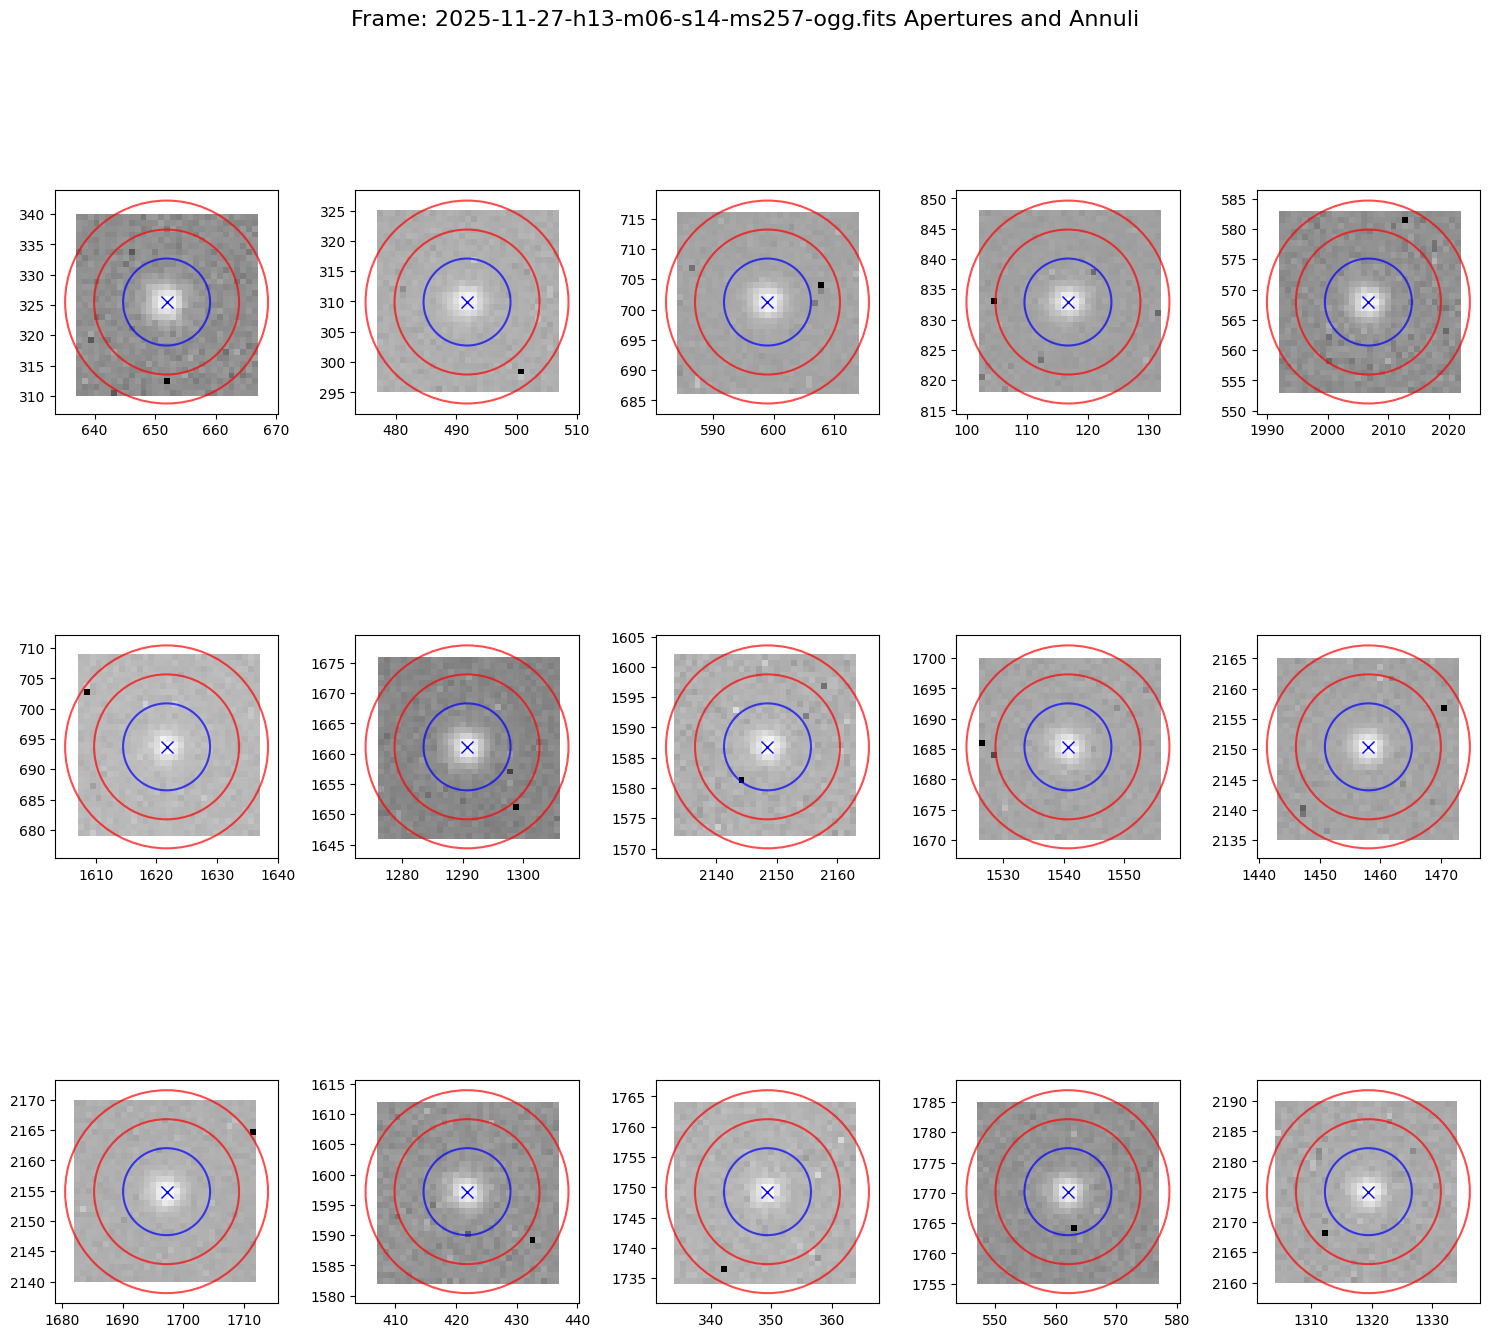

In [112]:
#2nd tile plots of cutouts of each reference star with aperture and annulus overplotted
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

#current frame is "{key}"
cutouts = [Cutout2D(pixel_array, position=pos, size=31) for pos in positions]

for ax, cutout, aperture, ann_ap in zip(axes.flatten(), cutouts, apertures, annulus_apertures):
    processed_cutout = imageprocessing(cutout.data)
    bbox = cutout.bbox_original
    ax.imshow(processed_cutout, cmap='gray', origin='lower', extent = [bbox[1][0], bbox[1][1], bbox[0][0], bbox[0][1]])
    ax.plot(aperture.positions[0], aperture.positions[1], marker='x', color='blue', label='Fitted Center', markersize=8)
    aperture.plot(ax=ax, color='blue', lw=1.5, alpha=0.7)
    ann_ap.plot(ax=ax, color='red', lw=1.5, alpha=0.7)
plt.suptitle(f"Frame: {key} Apertures and Annuli", fontsize=16)
plt.tight_layout()
plt.show()

Seems pretty reasonable, now we should do this for all frames.

In [62]:
for idx_frame, key in enumerate(merged_data.keys()):
    print(f"Performing aperture photometry for file {idx_frame+1} of {len(merged_data.keys())}: {key}")
    pixel_array = merged_data[key]['nddata'].data  
    
    positions = [(x, y) for x, y in zip(merged_data[key]['image_fit']['xs_fit'],
                                        merged_data[key]['image_fit']['ys_fit'])]
    apertures = [CircularAperture(pos, r=3*worst_sigma) for pos in positions]
    annulus_apertures = [CircularAnnulus(pos, r_in=5*worst_sigma, r_out=7*worst_sigma) for pos in positions]
    
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    
    aper_stats_list = [ApertureStats(pixel_array, aperture=ap, sigma_clip=None, error=merged_data[key]['nddata'].uncertainty.array) 
                        for ap in apertures]
    
    annulus_stats_list = [ApertureStats(pixel_array, aperture=ann_ap, sigma_clip=sigclip, error=merged_data[key]['nddata'].uncertainty.array) for ann_ap in annulus_apertures]
    total_anulus_list = [annulus_stats.median * aper_stats.sum_aper_area.value 
                         for annulus_stats, aper_stats 
                         in zip(annulus_stats_list, aper_stats_list)]
    total_bkg_sigma_list = [annulus_stats.mad_std * np.sqrt(np.pi / 2 / annulus_stats.sum_aper_area.value) * aper_stats.sum_aper_area.value 
                            for annulus_stats, aper_stats 
                            in zip(annulus_stats_list, aper_stats_list)]
    #note: aper_stats.sum_err is the uncertainty of the sum, propogated from the input error array
    apersum_subbkg_list  = [aper_stats.sum - total_anulus for aper_stats, total_anulus in zip(aper_stats_list, total_anulus_list)]
    apersum_subbkg_sigma_list = [np.sqrt(aper_stats.sum_err**2 + total_bkg_sigma**2)
                                for aper_stats, total_bkg_sigma in zip(aper_stats_list, total_bkg_sigma_list)]
    
    merged_data[key]['ref_fluxes'] = {
        'fluxes': np.array(apersum_subbkg_list),
        'flux_errors': np.array(apersum_subbkg_sigma_list)
    }

Performing aperture photometry for file 1 of 35: 2025-11-25-h02-m00-s14-ms936-tfn.fits
Performing aperture photometry for file 2 of 35: 2025-11-25-h05-m00-s13-ms688-lsc.fits
Performing aperture photometry for file 3 of 35: 2025-11-25-h05-m36-s42-ms454-lsc.fits
Performing aperture photometry for file 4 of 35: 2025-11-25-h06-m06-s14-ms909-lsc.fits
Performing aperture photometry for file 5 of 35: 2025-11-25-h07-m45-s12-ms840-elp.fits
Performing aperture photometry for file 6 of 35: 2025-11-25-h08-m30-s09-ms718-elp.fits
Performing aperture photometry for file 7 of 35: 2025-11-25-h09-m06-s12-ms841-elp.fits
Performing aperture photometry for file 8 of 35: 2025-11-25-h10-m06-s14-ms367-elp.fits
Performing aperture photometry for file 9 of 35: 2025-11-25-h11-m06-s18-ms072-elp.fits
Performing aperture photometry for file 10 of 35: 2025-11-25-h12-m47-s39-ms526-ogg.fits
Performing aperture photometry for file 11 of 35: 2025-11-25-h13-m06-s13-ms287-ogg.fits
Performing aperture photometry for file 1

In [76]:
#visualize the merged_data reference star fluxes in a dataframe
# row: observation file
# columns: reference star index
# entries: flux values after background subtraction
keys = list(merged_data.keys())
reference_star_fluxes_reduced = {filename: merged_data[filename]['ref_fluxes']['fluxes'] for filename in keys}
reference_star_fluxes_reduced_sigma = {filename: merged_data[filename]['ref_fluxes']['flux_errors'] for filename in keys}
import pandas as pd
reference_star_fluxes_df = pd.DataFrame.from_dict(reference_star_fluxes_reduced, orient='index')
reference_star_fluxes_sigma_df = pd.DataFrame.from_dict(reference_star_fluxes_reduced_sigma, orient='index')
reference_star_fluxes_np = reference_star_fluxes_df.to_numpy()
reference_star_fluxes_sigma_np = reference_star_fluxes_sigma_df.to_numpy()
reference_star_fluxes_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2025-11-25-h02-m00-s14-ms936-tfn.fits,4118.336243,3124.891812,5287.990580,5448.089195,3665.953561,2337.960727,6305.842605,2146.025324,3753.564678,3729.158859,3720.230807,3243.136737,1642.315197,3843.251640,2886.676895
2025-11-25-h05-m00-s13-ms688-lsc.fits,4158.747980,3306.738000,5458.215732,5371.905150,3730.015579,2364.710638,6371.509795,2128.485929,3742.468421,3789.007132,3928.941884,3458.042285,1790.991137,3904.877800,2759.263279
2025-11-25-h05-m36-s42-ms454-lsc.fits,4178.684837,2963.509138,5347.495387,5252.996728,3550.400823,2134.855672,6072.625127,1971.119013,3592.794416,3711.454958,3753.399482,3384.561236,1759.072464,3846.066835,2566.575154
2025-11-25-h06-m06-s14-ms909-lsc.fits,4296.166464,3136.044923,5240.361085,5292.248627,3509.373889,2230.238755,6245.608106,2073.484912,3815.509794,3757.069076,3879.484848,3368.437383,1974.683869,3900.262920,2819.831353
2025-11-25-h07-m45-s12-ms840-elp.fits,3685.836441,2879.703830,4882.312498,4757.942809,3273.968325,2115.898381,5543.930162,1861.262825,3235.313417,3528.489019,3278.362776,2840.236741,1730.930968,3489.724346,2539.229971


At this point, we've successfully calculated the integrated ADU of the reference stars across all frames, controlling for the background

# Normalization Calculation

To systematically remove the effect of the seeing conditions from the asteroid integrated flux, we need to normalize all calculations to a standard. We pool the ratios of the brightnesses of each reference star on all images to calculate the scaling factor that a frame should take to scale to standard. Because the filters are generally narrow in bandwith and the chosen reference stars are within a small magnitude range, we can assume that the seeing effects a mostly multiplicatively linear scalar for each frame - assuming that the atmospheric extinction behaves this way.

To calculate the normalization cofficient of any one frame, we will weigh the measurements by their variance reciprocal as standard practice, as that is the signifier for their confidence.

Specifically, the median is chosen instead of any observation in general to lower the propogated error.

For index $i$ on frames, and $j$ on reference stars on the reduced ADU count observations $x_{ij}$:

$$ R_{i} = \frac{\displaystyle \sum_j (w_{ij} \cdot \frac{x_{ij}}{\tilde{x}_{j}})}{\sum_j w_{ij} }, \qquad \tilde x_j = \mathrm{median}(\{x_{ij}\})$$

$w_{ij}$ should be the variance reciprocal of its product partner (the ratio)

From earlier, the standard deviation of the median is 
$$\sqrt{\text{Var}(\tilde{x})} \approx   \sqrt{\frac{\pi}{2 N}} \sigma $$

and so the median of a reference star across multiple frames is:
$$\tilde\sigma_{j} =\sqrt{\text{Var}(\tilde{x}_j)} \approx   \sqrt{\frac{\pi}{2 N_{frames}}} \bar{\sigma}_j$$

Where $N_{frames}$ is the number of frames, and $\bar{\sigma}_j$ is the estimator of the standard deviation of the reference star by the average of its errors across the frames.

By the general rule of taylor expansion rule for variances*, we obtain the propogated error of the reference star ratios.
$$
\frac{Var(\frac{x_{ij}}{\tilde x_j})}{\left( \frac{x_{ij}}{\tilde x_j} \right)^2} = \left( \frac{\sigma_{ij}}{x_{ij}} \right)^2 + \left( \frac{\tilde \sigma_j}{\tilde x_j} \right)^2 = \left( \frac{\sigma_{ij}}{x_{ij}} \right)^2 + \left( \frac{\bar\sigma_j}{\tilde x_j}\right)^2 \frac{\pi}{2N}, \qquad w_{ij} = \frac{1}{Var(\frac{x_{ij}}{\tilde x_j})}
$$

As such, the variance of the weighted frame ratio simplifies to:
$$
\sigma_{R,i}^2=Var(R_i)\approx  \frac{1}{\sum_j w_{ij}}
$$

*Because $N_{frames}$ is large, the covariance from the single observation and the median is minimal and ignored

In [89]:
medians= np.median(reference_star_fluxes_np, axis=0) #tilde x j

# bar sigma j
medians_error = np.mean(reference_star_fluxes_sigma_np, axis=0) * np.sqrt(np.pi / (2 * reference_star_fluxes_np.shape[0]))  #propogated error on the median
medians, medians_error

(array([3967.30278721, 2924.2886862 , 5000.93495317, 4920.04204195,
        3433.11810297, 2139.1415036 , 5986.71687617, 2030.3205562 ,
        3592.79441602, 3711.45495849, 3595.8727962 , 3243.13673746,
        1730.93096772, 3843.25163965, 2566.57515428]),
 array([18.48386246, 17.29978765, 19.79101902, 19.50893782, 17.60983636,
        15.65108107, 20.28363116, 15.91366857, 17.71365054, 17.84432506,
        18.01010201, 17.13124803, 15.29291737, 17.85343675, 16.67918787]))

In [113]:
# reference_star_fluxes_np = reference_star_fluxes_df.to_numpy()
# reference_star_fluxes_sigma_np = reference_star_fluxes_sigma_df.to_numpy()

#taking advantage of numpy broadcasting
# Var_ij flux norm = (tilde x j / x_ij)^2 * [(sigma ij / x ij)^2 + pi/2N * (bar sigma j / tilde x j)^2])
var_ij_norm = (medians / reference_star_fluxes_np)**2 * ( (reference_star_fluxes_sigma_np / reference_star_fluxes_np)**2 + (np.pi / (2 * reference_star_fluxes_np.shape[0])) * (medians_error / medians)**2 )

weights_ij = 1 / var_ij_norm

R_i = np.sum(weights_ij * (reference_star_fluxes_np / medians), axis=1) / np.sum(weights_ij, axis=1)

R_sigma_i = np.sqrt(1 / np.sum(weights_ij, axis=1))

R_i, R_sigma_i

(array([1.05370232, 1.07053555, 1.03151873, 1.05578098, 0.94476412,
        0.89341728, 0.93162163, 0.93019646, 0.87254463, 1.11868999,
        1.10646267, 1.07586257, 0.9326088 , 0.85841339, 1.13213335,
        1.08888459, 0.99605848, 0.53103006, 1.10888879, 1.10200731,
        0.94750898, 0.95475052, 1.14882619, 1.14925804, 1.12030302,
        1.06338068, 0.81747405, 0.79979634, 0.792635  , 0.93274793,
        0.9693436 , 0.96373987, 0.9525918 , 1.11529211, 1.11424612]),
 array([0.00559118, 0.00539324, 0.00567461, 0.0053891 , 0.0068835 ,
        0.00763988, 0.00696443, 0.00702866, 0.00786703, 0.00502476,
        0.00510612, 0.00540777, 0.00696601, 0.00799906, 0.00489997,
        0.00522186, 0.00604398, 0.01910033, 0.00505033, 0.00516222,
        0.00659121, 0.00661137, 0.00481213, 0.00476784, 0.00503774,
        0.00555825, 0.00854818, 0.00907486, 0.00936518, 0.0070241 ,
        0.00642467, 0.00651926, 0.00670477, 0.00505192, 0.00502447]))

In [114]:
for idx, key in enumerate(merged_data.keys()):
    merged_data[key]['R_i'] = R_i[idx]
    merged_data[key]['R_sigma_i'] = R_sigma_i[idx]

In [117]:
# some information is copied by reference, and all the fits sci and err arrays are in merged_data which is very large by now
# the next ipynb should be run with the same kernel to avoid headache
# it works, file is 1.5GB
#save to pickle
import pickle
with open('merged_data.pkl', 'wb') as f:
    pickle.dump(merged_data, f)

In [118]:
merged_data[list(merged_data.keys())[0]].keys()

dict_keys(['icrs', 'image', 'nddata', 'image_fit', 'ref_fluxes', 'R_i', 'R_sigma_i'])

In [116]:
hdul.close()